# **Import Libraries**

In [17]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier, StackingClassifier

# **Load Dataframe and split into Train and Test**

In [2]:
data_path = '/content/drive/My Drive/Aircraft_Accidents_New/'

data = pd.read_csv(os.path.join(data_path, 'preprocessed_by_PCA.csv')).drop(['Unnamed: 0'],axis=1)
data.head(5)

,Country,Injury Severity,Aircraft Damage,Amateur Built,Aircraft Category,Total Uninjured,Engine Type,Purpose of Flight,Weather Condition,Number of Engines,Broad Phase of Flight,ASI
0,167,1,1,0,13,299,9,21,2,2,4,1
1,167,1,2,0,0,0,6,14,2,1,5,1
2,167,1,2,0,13,1,6,0,2,1,5,1
3,167,0,2,0,13,0,6,14,2,1,2,3
4,167,1,0,0,13,0,6,14,2,1,2,2


## **Train-Test Split**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=["ASI"]), data["ASI"], test_size=0.2, random_state=42)

class_names = {1: 'Negligible', 2: 'Minor', 3: 'Hazard', 4: 'Catastrophe'}


# Classical ML Models

## **1. Decision Tree Classifier**

Accuracy:  85.53 %



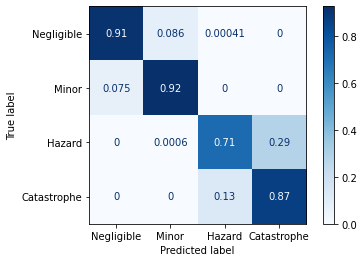

In [7]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)

dtree.fit(X_train, y_train)
dt_preds = dtree.predict(X_test)

dt_acc = accuracy_score(y_test, dt_preds) * 100

print("Accuracy: ", dt_acc, "%\n")
plot_confusion_matrix(dtree, X_test, y_test, display_labels=class_names.values(), cmap=plt.cm.Blues, normalize='true')

## **2. Gaussian Naive Bayes**

Accuracy:  68.625 %



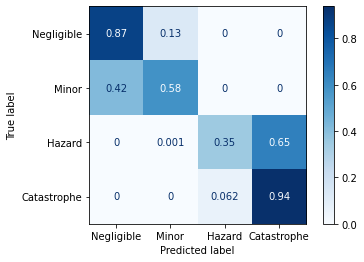

In [8]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)
gnb_preds = gnb.predict(X_test)

gnb_acc = accuracy_score(y_test, gnb_preds) * 100

print("Accuracy: ",gnb_acc , "%\n")
plot_confusion_matrix(gnb, X_test, y_test, display_labels=class_names.values(), cmap=plt.cm.Blues, normalize='true')


## **3. K-Nearest Neighbors**

Accuracy:  79.595 %



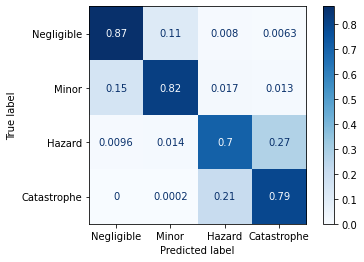

In [9]:
knn = KNeighborsClassifier(n_neighbors= 3)

knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

knn_acc = accuracy_score(y_test, knn_preds) * 100

print("Accuracy: ", knn_acc , "%\n")
plot_confusion_matrix(knn, X_test, y_test, display_labels=class_names.values(), cmap=plt.cm.Blues, normalize='true')


## **4. Support Vector Machine Classifier**

Accuracy:  73.015 %



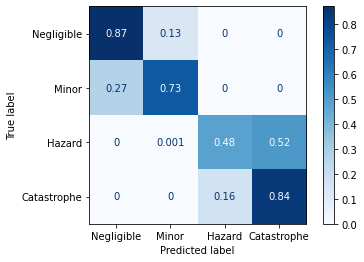

In [71]:
svc_clf = SVC(C=1, kernel= 'linear', random_state= 42)
svc_clf.fit(X_train, y_train) 
svc_preds = svc_clf.predict(X_test)

svc_acc = accuracy_score(y_test, svc_preds) * 100

print("Accuracy: ", svc_acc, "%\n")
plot_confusion_matrix(svc_clf, X_test, y_test, display_labels=class_names.values(), cmap=plt.cm.Blues, normalize='true')


# Ensemble ML Models

## **5. Random Forest**

Accuracy:  85.785 %



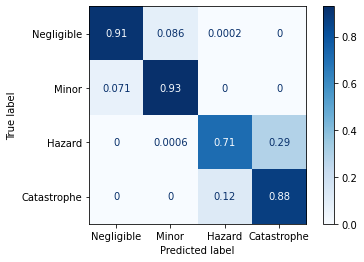

In [14]:
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=100, random_state= 42)
rf_clf.fit(X_train, y_train) 
rf_preds = rf_clf.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds) * 100

print("Accuracy: ", rf_acc, "%\n")
plot_confusion_matrix(rf_clf, X_test, y_test, display_labels=class_names.values(), cmap=plt.cm.Blues, normalize='true')


## **6. Ensemble Method: Boosting**

Accuracy:  85.61 %



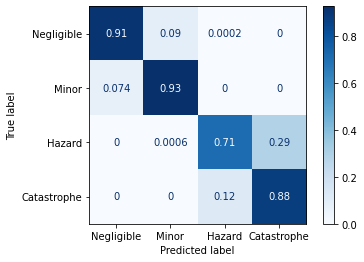

In [15]:
cart = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)

adb_clf = AdaBoostClassifier(base_estimator=cart, n_estimators=500, learning_rate=0.1, random_state=42)

adb_clf.fit(X_train, y_train) 
adb_preds = adb_clf.predict(X_test)

adb_acc = accuracy_score(y_test, adb_preds) * 100

print("Accuracy: ", adb_acc, "%\n")
plot_confusion_matrix(adb_clf, X_test, y_test, display_labels=class_names.values(), cmap=plt.cm.Blues, normalize='true')


## **7. XGBoost Classifier**

Accuracy:  85.72999999999999 %



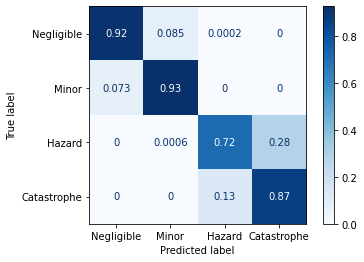

In [18]:
xgb_clf = XGBClassifier(max_depth=100, learning_rate=0.1, n_estimators= 500, random_state=42)

xgb_clf.fit(X_train, y_train) 
xgb_preds = xgb_clf.predict(X_test)

xgb_acc = accuracy_score(y_test, xgb_preds) * 100

print("Accuracy: ", xgb_acc, "%\n")
plot_confusion_matrix(xgb_clf, X_test, y_test, display_labels=class_names.values(), cmap=plt.cm.Blues, normalize='true')


## **8. Ensemble Method: Stacking**

Accuracy:  83.89999999999999 %



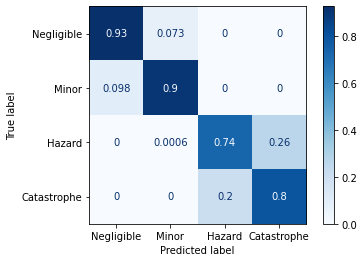

In [19]:
clf1 = XGBClassifier(max_depth=100, learning_rate=0.1, n_estimators= 500, random_state=42)
clf2 = RandomForestClassifier(n_estimators=500, random_state=42, criterion='entropy')
clf3 = DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=42)
clf4 = KNeighborsClassifier(n_neighbors=3, weights= 'distance', metric='euclidean')

est = [('rf', clf2), ('dt', clf3), ('knn', clf4)]

stk_clf = StackingClassifier(estimators= est, final_estimator= clf1)

stk_clf.fit(X_train, y_train) 
stk_preds = stk_clf.predict(X_test)

stk_acc = accuracy_score(y_test, stk_preds) * 100

print("Accuracy: ", stk_acc, "%\n")
plot_confusion_matrix(stk_clf, X_test, y_test, display_labels=class_names.values(), cmap=plt.cm.Blues, normalize='true')


## **9. Ensemble Method: Voting**

Accuracy:  85.725 %



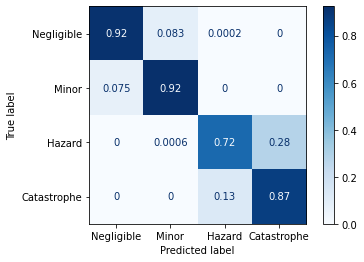

In [21]:
est = [('xgb', clf1), ('rf', clf2), ('dt', clf3), ('knn', clf4)]

vot_clf = VotingClassifier(estimators= est, voting='hard', flatten_transform=True, weights= [1,1,1,1])

vot_clf.fit(X_train, y_train) 
vot_preds = vot_clf.predict(X_test)

vot_acc = accuracy_score(y_test, vot_preds) * 100

print("Accuracy: ", vot_acc, "%\n")
plot_confusion_matrix(vot_clf, X_test, y_test, display_labels=class_names.values(), cmap=plt.cm.Blues, normalize='true')


# **Comparison Plots**

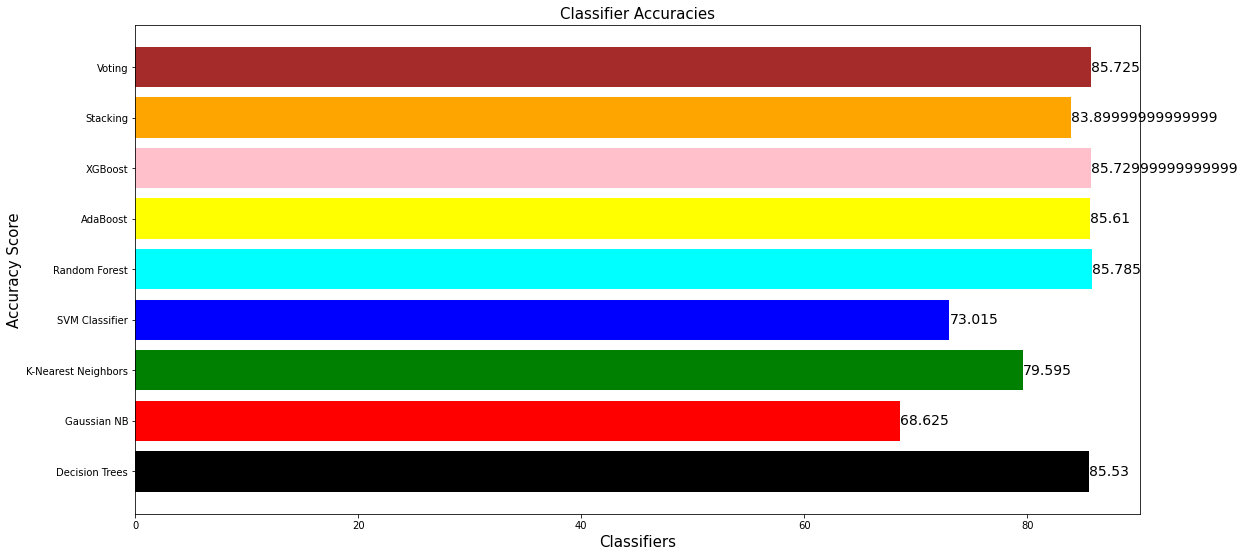

In [72]:
outputs = {'Decision Trees': dt_acc, 'Gaussian NB': gnb_acc, 'K-Nearest Neighbors': knn_acc, 
           'SVM Classifier': svc_acc, 'Random Forest': rf_acc, 'AdaBoost': adb_acc, 'XGBoost': xgb_acc, 
           'Stacking': stk_acc, 'Voting': vot_acc}

plt.figure(figsize=(18, 9))
colors= ['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'pink', 'orange', 'brown']

plt.barh(list(outputs.keys()), list(outputs.values()), color=colors)
plt.xlabel("Classifiers", fontsize= '15')
plt.ylabel("Accuracy Score", fontsize= '15')
plt.title("Classifier Accuracies", fontsize=15)

for i in range(len(colors)):
    plt.text(list(outputs.values())[i], list(outputs.keys())[i], s= str(list(outputs.values())[i]) , va="center", size=14)